In [36]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.15.0


In [37]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

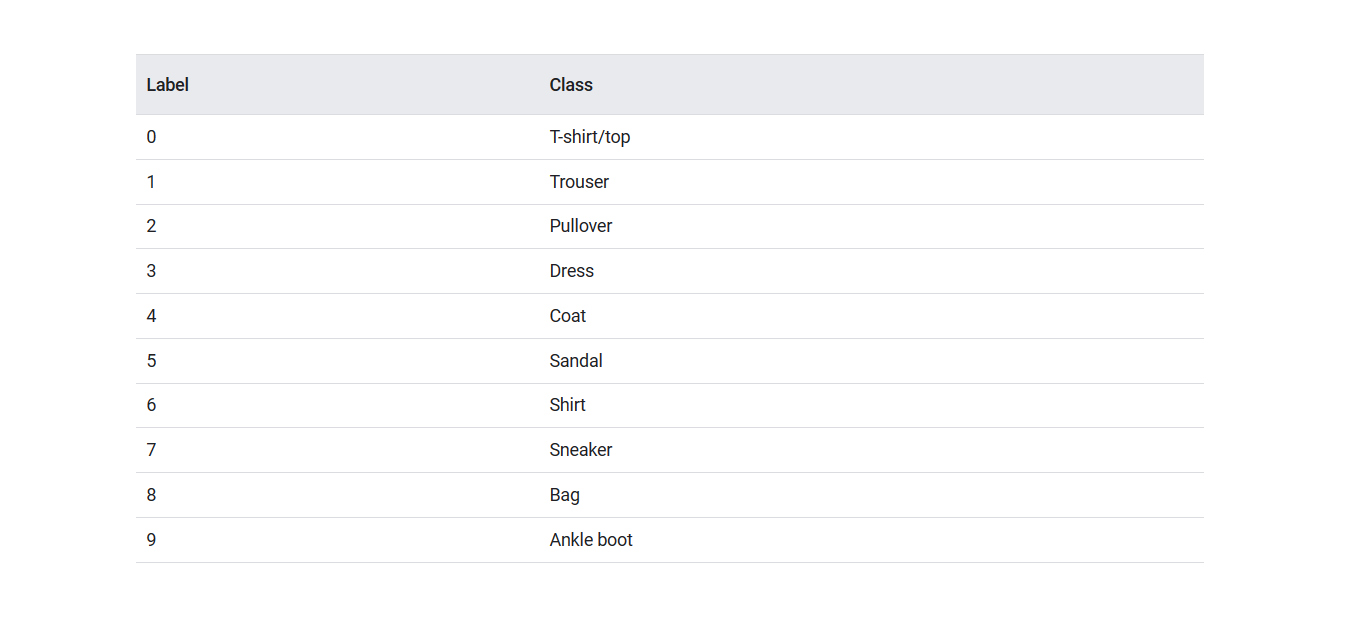

In [38]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [39]:
train_images = train_images / 255.0

test_images = test_images / 255.0


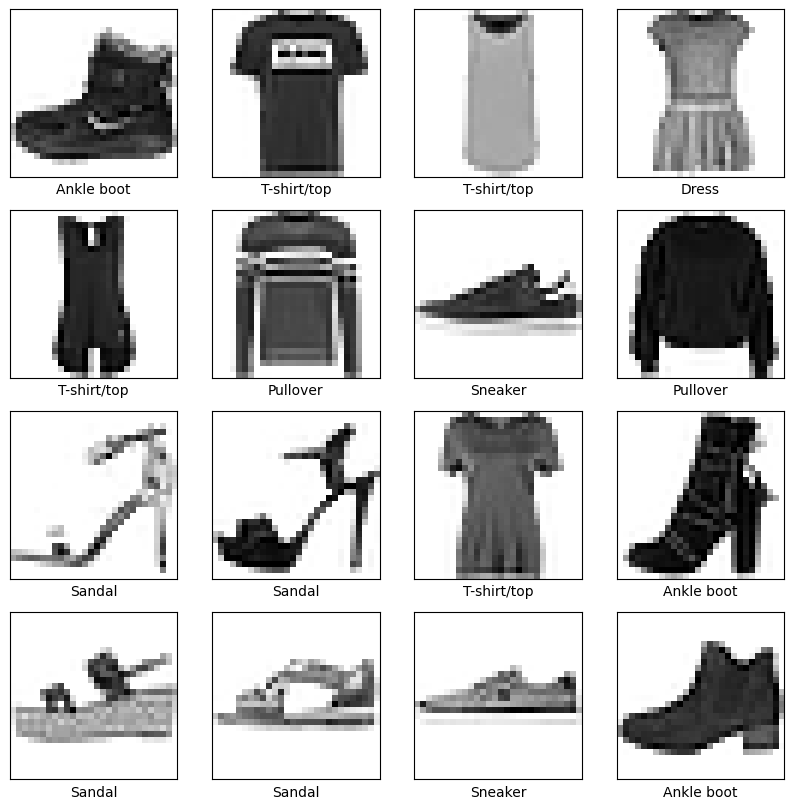

In [40]:
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [41]:
from tensorflow.keras import layers, models
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [42]:
for layer in model.layers:
    print(layer)

In [43]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_2 (Flatten)         (None, 576)              

In [44]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Epoch 1/5
938/938 [==============================] - 7s 6ms/step - loss: 0.5401 - accuracy: 0.8001 - val_loss: 0.3977 - val_accuracy: 0.8541
Epoch 2/5
938/938 [==============================] - 5s 5ms/step - loss: 0.3436 - accuracy: 0.8753 - val_loss: 0.3251 - val_accuracy: 0.8810
Epoch 3/5
938/938 [==============================] - 4s 5ms/step - loss: 0.2914 - accuracy: 0.8936 - val_loss: 0.2987 - val_accuracy: 0.8908
Epoch 4/5
938/938 [==============================] - 5s 5ms/step - loss: 0.2608 - accuracy: 0.9044 - val_loss: 0.2812 - val_accuracy: 0.8981
Epoch 5/5
938/938 [==============================] - 4s 5ms/step - loss: 0.2388 - accuracy: 0.9118 - val_loss: 0.2683 - val_accuracy: 0.8994


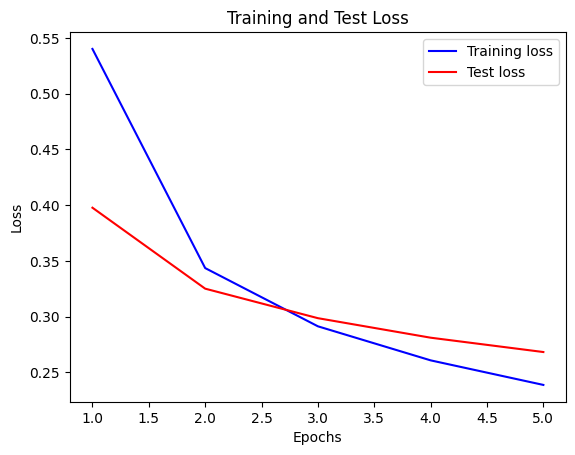

In [45]:
import matplotlib.pyplot as plt


history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))


train_loss = history.history['loss']
test_loss = history.history['val_loss']

epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, test_loss, 'r', label='Test loss')
plt.title('Training and Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [46]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [47]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

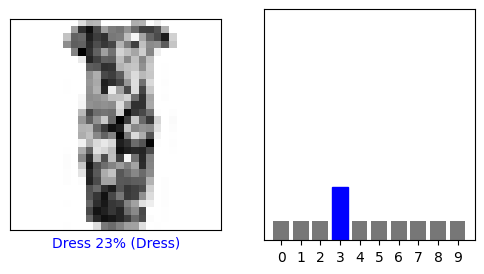

In [51]:
i = 100
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

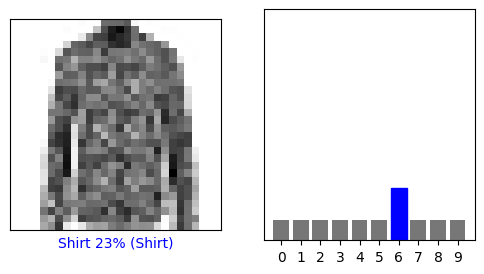

In [52]:
i = 101
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

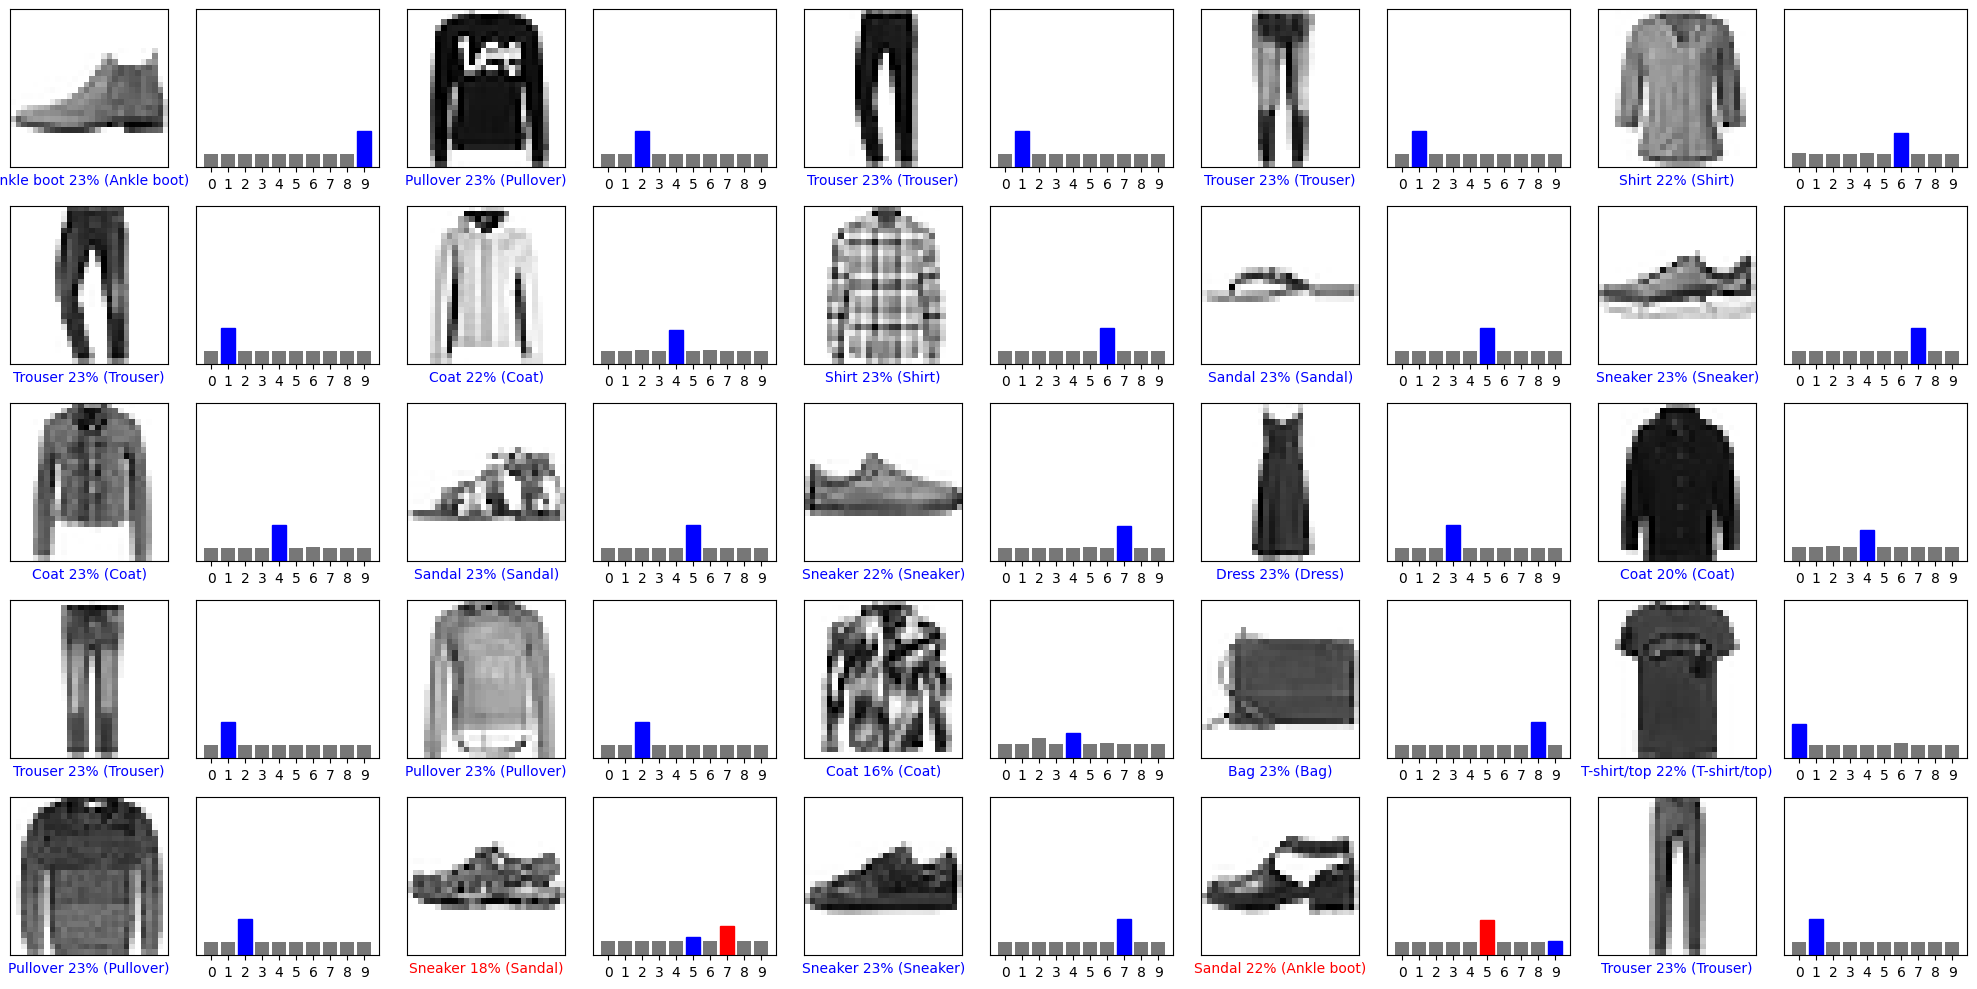

In [53]:
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [54]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.2683 - accuracy: 0.8994 - 882ms/epoch - 3ms/step

Test accuracy: 0.899399995803833


Cho dự đoán thử một bức ảnh bất kỳ

In [55]:
from tensorflow.keras.preprocessing import image

image_path = '/content/OIP.jpg'


img = image.load_img(image_path, target_size=(28, 28), color_mode='grayscale')
plt.figure(figsize=(10,10))
plt.imshow(img,cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0


predictions = model.predict(img_array)


predicted_label = np.argmax(predictions[0])


print(f"Predicted label: {predicted_label}")


1/1 [==============================] - 1s 780ms/step
Predicted label: 2


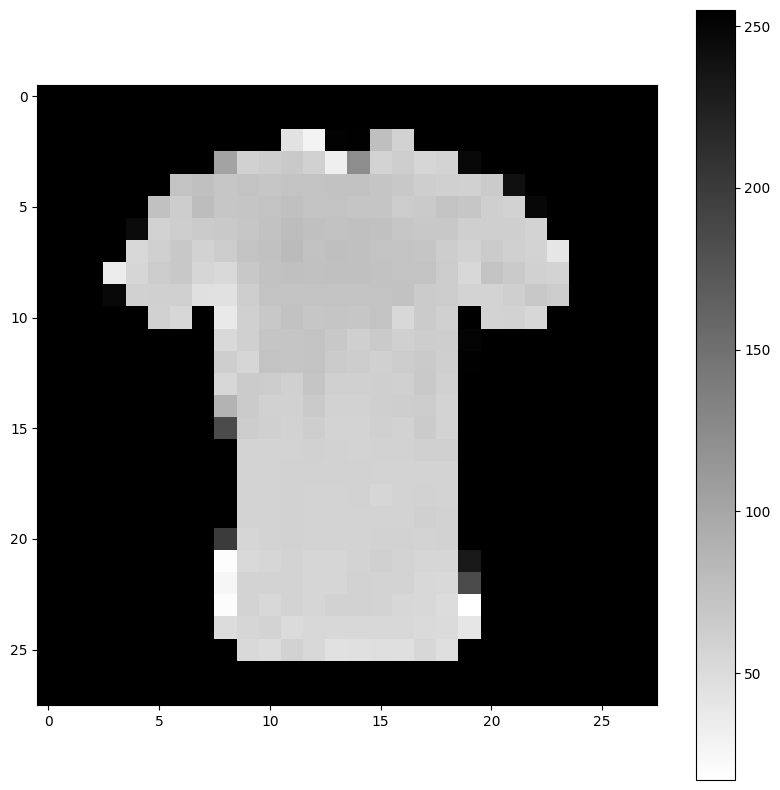

In [58]:
plt.figure(figsize=(10,10))
plt.imshow(img,cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

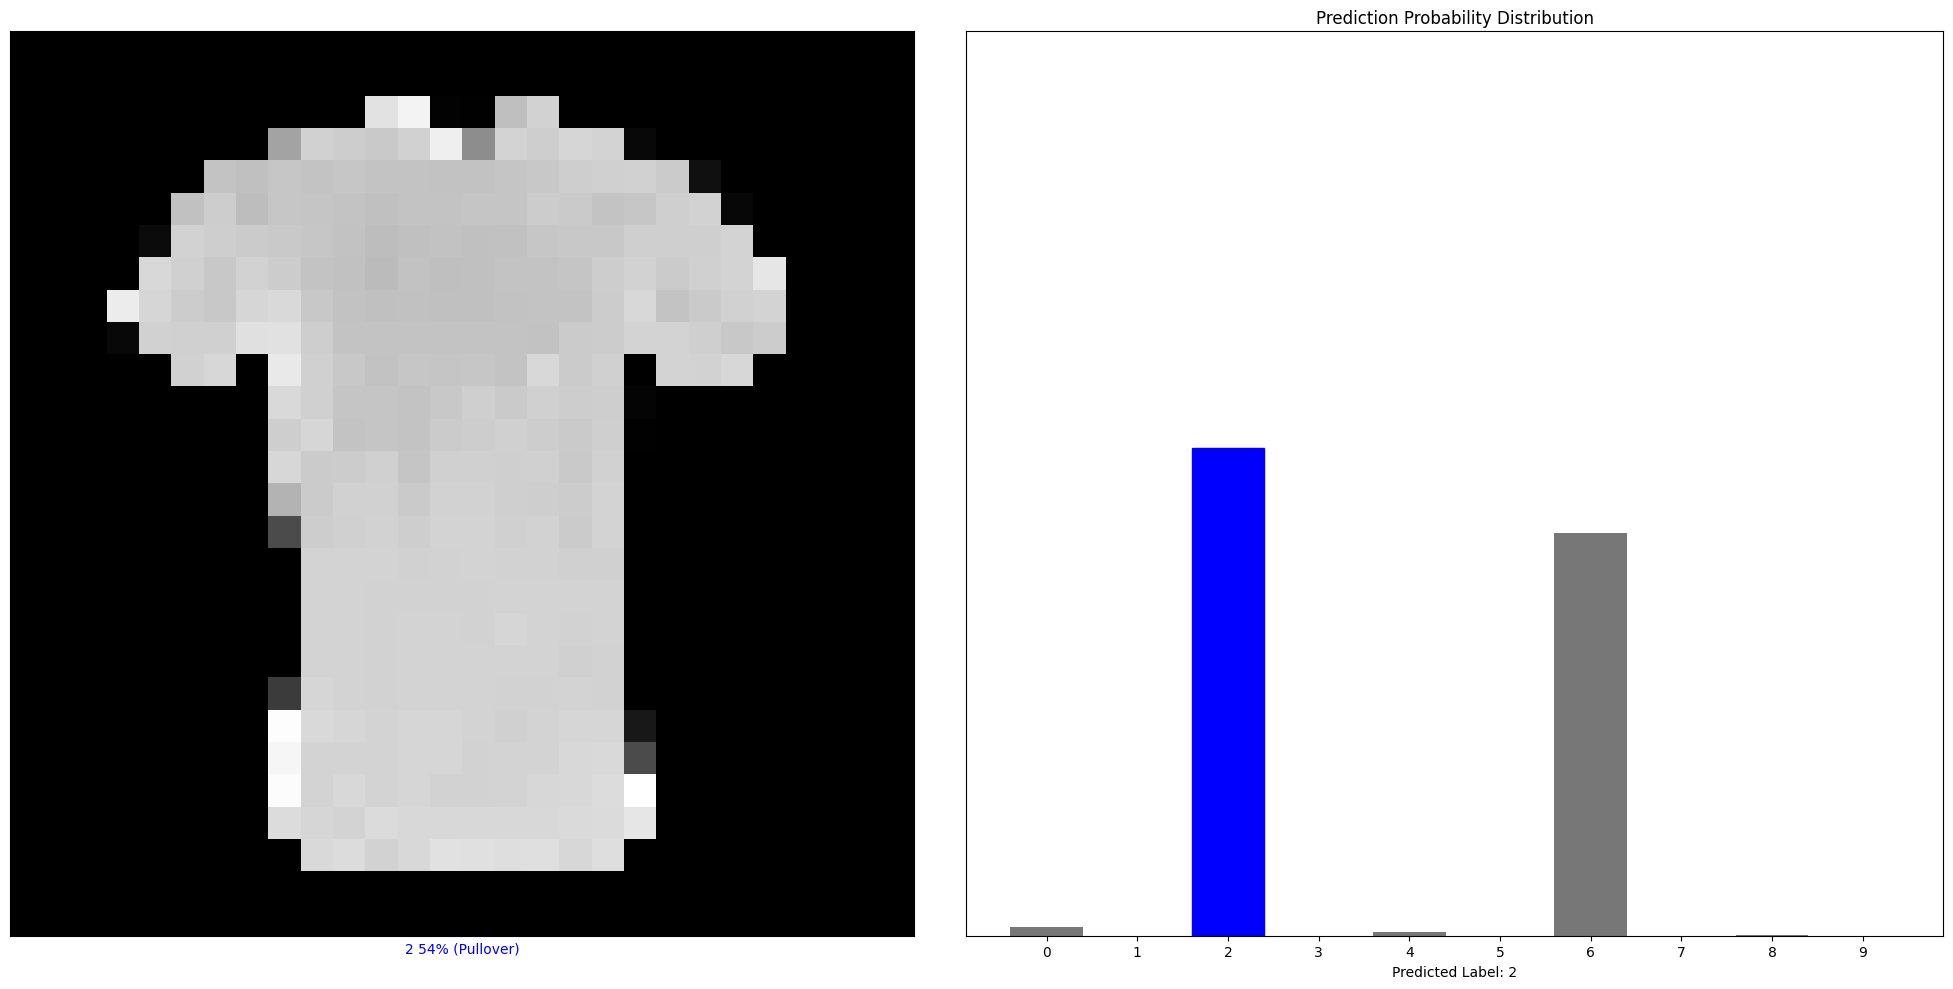

In [70]:
def plot_image_test(predictions_array, img):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    color = 'blue'
    plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                          100*np.max(predictions_array),
                                          class_names[predicted_label]),
                                          color=color)

def plot_value_array_test(predictions_array):
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array[0], color="#777777")  # Chỉ lấy phần tử đầu tiên của predictions_array
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('blue')
    plt.xlabel("Predicted Label: {}".format(predicted_label))
    plt.title("Prediction Probability Distribution")



plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plot_image_test(predictions,img)
plt.subplot(1,2, 2)
plot_value_array_test(predictions)
plt.tight_layout()
plt.show()